<a href="https://colab.research.google.com/github/LuisCastroV/ADA-Informes/blob/main/Informe_8_Optimal_BST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Optimal Binary Search Tree *(Optimal BST)*

---
**Entrada**: Secuencia ordenada de $n$ claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen **claves ficticias $d_i$** que representan **búsquedas fallidas** con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Construir un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.

---
**Imagen referencial del árbol binario de búsqueda óptimo:**

![image](https://qph.cf2.quoracdn.net/main-qimg-75a50568e29dd3ddbebf4fa80b4e85d8-pjlq)

**Breve información:** En informática, un árbol de búsqueda binario óptimo, a veces llamado árbol binario de peso equilibrado, es un árbol de búsqueda binario que proporciona el tiempo de búsqueda más pequeño posible (o tiempo de búsqueda esperado) para una secuencia dada de accesos (o probabilidades de acceso). Los BST óptimos generalmente se dividen en dos tipos: estáticos y dinámicos.

- En problemas de optimización estática, el árbol no se puede modificar una vez que se ha construido. En este caso, existe una disposición particular de los nodos del árbol que proporciona el menor tiempo de búsqueda esperado para las probabilidades de acceso dadas.

- En problemas de optimización dinámica, el árbol se puede modificar en cualquier momento, normalmente permitiendo rotaciones de árboles. Se considera que el árbol tiene un cursor que comienza en la raíz que puede mover o usar para realizar modificaciones.

# 2. Descripción del algoritmo

Dada una matriz ordenada *mat[0.. n-1]* de claves de búsqueda y una matriz *freq[0.. n-1]* de conteos de frecuencia, donde freq[i] es el número de búsquedas de *keys[i]*. Se construye un árbol de búsqueda binaria de todas las claves de modo que el costo total de todas las búsquedas sea lo más pequeño posible.
Primero definamos el costo de un BST. El costo de un nodo BST es el nivel de ese nodo multiplicado por su frecuencia. El nivel de la raíz es 1.

#2.1. Recursivo

El costo óptimo para *freq[i..j]* se puede calcular recursivamente usando la siguiente fórmula. 

$optcost(i,j)$ $=$ $\sum\limits_{k=i}^j freq[k] + min_{r=i}^j[optcost(i,r-1)+optcost(r+1,j)]$
       
Necesitamos calcular $optCost(0, n-1)$ para encontrar el resultado. La idea de la fórmula anterior es simple, uno por uno probamos todos los nodos como raíz *(r varía de i a j en el segundo término)*. Cuando hacemos que el nodo $r$ sea raíz, calculamos recursivamente el costo óptimo de $i$ a $r-1$ y de $r+1$ a $j$. Agregamos la suma de las frecuencias de $i$ a $j$ *(ver el primer término en la fórmula anterior)*

La razón para sumar la frecuencias de $i$ a $j$, se puede dividir en 2 partes, una es la frecuencia $[r]$ $+$ la suma de las frecuencias de todos los elementos de $i$ a $j$ excepto $r$. El término $freq[r]$ se agrega porque va a ser raiz y eso significa nivel de 1, entonces $freq[r]*1=freq[r]$. Ahora viene la parte real, estamos sumando las frecuencias de los elementos restantes porque cuando tomamos $r$ como raíz, todos los elementos que no sean van 1 nivel por debajo del calculado en el subproblema, para calcular $optcost(i,j)$ asumimos que $r$ se toma como raíz y calculamos el mínimo de $opt(i,r-1)+opt(r+1,j)$ para todos $i<=r<=j$. Aquí, para cada subproblema, estamos eligiendo un nodo como raíz. Pero en realidad el nivel de la raíz del subproblema y todos sus nodos descendientes serán 1 mayor que el nivel de la raíz del problema principal.

#2.1.1. Código Recursivo



In [ ]:
#Función recursiva para calcular costo del árbol de búsqueda binario óptimo
def optCost(freq, i, j):
    #Casos bases
    if j < i:     #no hay elementos en el subarreglo
        return 0
    if j == i:     #un elemento en el subarreglo
        return freq[i]
    #Obtener la suma de freq[i], freq[i+1], ... freq[j]
    fsum = Sum(freq, i, j)
    #Inicializar valor mínimo
    Min = 999999999999
    #Uno por uno considera todos los elementos como raiz y encontrar recursivamente el costo de
    #el BST, compare el costo con min y actualice min si es necesario
    for r in range(i, j + 1):
        cost = (optCost(freq, i, r - 1) +
                optCost(freq, r + 1, j))
        if cost < Min:
            Min = cost
    #Devolver valor mínimo
    return Min + fsum
 
#Función principal que calcula el mínimo costo de un árbol de búsqueda binaria.
#Usa optCost() para encontrar el costo óptimo.
def optimalSearchTree(keys, freq, n):
  #Se supone que las claves de matriz [] son ordenados en orden creciente. Si las llaves[]
  #no está ordenado, luego agregue código para ordenar, y reorganice freq[] en consecuencia.
  return optCost(freq, 0, n - 1)

#Función de utilidad para obtener la suma de elementos del arreglo freq[i] a freq[j]
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

#2.2. Programación Dinámica

Usamos una matriz auxiliar $cost[n][n]$ para almacenar las soluciones de los subproblemas. $cost[0][n-1]$ mantendrá el resultado final. La idea es que todos los valores de la diagonal deben completarse primero, luego los valores que se encuentran en la línea justo encima de la diagonal. Es decir, primero debemos llenar todos los valores de $costo[i][i]$, luego todos los valores de $costo[i][i+1]$, luego todos los valores de $costo[i][i+2]$. La idea utilizada en la implementación es la misma que el problema de multiplicación de cadenas de matriz, se usa una variable $size$ para la longitud de la cadena e incrementamos $size$, uno por uno. Calculamos el número de columna $j$ usando los valores de $i$ y $size$. 

#2.2.1. Código Programación Dinámica

In [ ]:
import sys

#Función para encontrar el costo óptimo para construir un árbol de búsqueda binaria
def findOptimalCostA(freq):
    n = len(freq)
    #Cost[i][j] almacena el costo óptimo para construir BST desde las claves i a j
    cost = [[0] * (n + 1) for _ in range(n + 1)]
    #Caso base: el costo es igual a la frecuencia para i = j (clave única)
    for i in range(n):
        cost[i][i] = freq[i]
    #Todos los tamaños de secuencias
    for size in range(1, n + 1):
        #Todos los puntos de partida de las secuencias
        for i in range(n - size + 2):
            j = min(i + size - 1, n - 1)
            cost[i][j] = sys.maxsize
            #Considera cada clave como raíz y calcula el costo óptimo
            for r in range(i, j + 1):
                total = 0
                #Obtener el costo del nodo actual
                for k in range(i, j + 1):
                    total += freq[k]
                #Agregar el costo óptimo del subárbol izquierdo
                if r != i:
                    total += cost[i][r - 1]
                #Agregar el costo óptimo del subárbol derecho
                if r != j:
                    total += cost[r + 1][j]
                #Actualizar la matriz de costos si es necesario
                cost[i][j] = min(total, cost[i][j])
    #Devolver el costo resultante
    return cost[0][n - 1]
 
 

In [ ]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

keys, p, q = optimal_bst_instance_generator(10)
print("Arreglo",keys)
print("Probabilidad de las claves",p)
print("Probabilidad de las claves ficticias",q)
print("El costo de BST óptimo (recursivo) es:",optimalSearchTree(keys, p, len(keys)))
print("El costo de BST óptimo (programación dinámica) es:", findOptimalCostA(p))

Arreglo [3, 31, 32, 45, 46, 65, 78, 90, 95, 99]
Probabilidad de las claves [0.07113751683729883, 0.06291578507794292, 0.07418242842812978, 0.06443133159433939, 0.06626018336141257, 0.03528942612083757, 0.0031269493459881266, 0.05967775155443039, 0.03247390983588809, 0.034714067857144086]
Probabilidad de las claves ficticias [0.07766887 0.02537725 0.02922801 0.06328359 0.05232402 0.03157918
 0.0712387  0.05605258 0.05609215 0.02863491 0.00431139]
El costo de BST óptimo (recursivo) es: 1.335189084867885
El costo de BST óptimo (programación dinámica) es: 1.335189084867885


# 3. Tiempo de ejecución

#3.1 Recursivo

In [ ]:
#Algoritmo OBSTR (Main)
#   Sort A[1..n] and F[1..n] by the keys
#   return findOptimalCost(A, F, 1, n)

#Algoritmo OBSTR(A, F, lef t, right)

# best = +∞
# for i = lef t to right . try each as the root
#   costlef t = findOptimalCost(A, F, lef t, i − 1)
#   costright = findOptimalCost(A, F, i + 1, right)
#   costtotal = costlef t + costright + sumatoria de F[v], donde v toma valor de left a right
#   if costtotal < costbest
#     best = costtotal
# return best


Por ende el tiempo de ejecución es $2^{O(n)}$.

#3.2. Programación dinámica

Para todas las posibles secuencias contiguas de claves y todas las posibles raíces, calcule los subárboles óptimos:

In [ ]:
#Algoritmo OBSTDP

# for size in 1 .. n loop             Todos los tamaños de secuencias
#   for i in 1 .. n-size+1 loop       Todos los puntos de partida de las secuencias.
#     j := i + size - 1
#     e(i, j) := float'max;
#     for r in i .. j loop        -- Todas las raíces de la secuencia ki .. kj
#       t := e(i, r-1) + e(r+1, j) + w(i, j)
#       if t < e(i, j)  then
#         e(i, j) := t
#         root(i, j) := r
#       end if
#     end loop
#   end loop
# end loop

Por ende el tiempo de ejecución es $O(n^3)$.

#4. Correctitud

Supongamos que se nos da una lista de claves $k1 < k2 < . . . < k_n$, y una lista de probabilidades $p_i$ que cada llave sea buscada. Un árbol de búsqueda binario óptimo es un $BST T$ que minimiza la búsqueda esperada tiempo.

$\sum\limits_{i=1}^n p_i(depth_T(k_i)+1)$

donde la profundidad de la raíz es 0. Supondremos que las claves son los números $1, 2, . . . , n$. Mediante el uso programación dinámica, sin embargo, podemos resolver el problema de manera eficiente.

Primero calcular el valor numérico del tiempo de búsqueda esperado para un BST óptimo, y luego consideraremos cómo modificar nuestra solución para encontrar el BST correspondiente. Sea $1 ≤ i ≤ j ≤ n$, y sea $T$ cualquier $BST$ en $i, . . . , J$. Definiremos el costo de $T$:

$C(T)$ $=$ $\sum\limits_{l=i}^j p_l(depth_T(l)+1)$

y los subproblemas:

$C_{ij}$ $=$ $min_{T on i,...,j}$$C(T)$


El tiempo de búsqueda esperado para el $BST$ óptimo es $C_{1n}$.

El costo de $T$ es: 

$C(T_L)$ $+$ $C(T_R)$ $+$ $\sum\limits_{l=i}^j p_l$

Y así definimos la recurrencia $C'_{ij}$:

$C'_{ij}$ =  \begin{cases}
    min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\}+\sum\limits_{l=i}^{j} p_l, & \text{if $i < j$}.\\
    p_i, & \text{if $i = j$}.\\
    0, & \text{if $i > j$}
  \end{cases}

Se pretende que: $C'_{ij}$ =$C_{ij}$

La demostración se hace por inducción en $j − i$, el caso base es trivial.

$C'_{ij}$ $>=$ $C_{ij}$, según el cálculo anterior $C'_{ij}$ es el costo de algunos BST en $i,....,j$ y $C_{ij}$ es el costo de un BST óptimo.

$C'_{ij}$ $<=$ $C_{ij}$, supongamos que la raíz de la BST óptima es $k$. 

Entonces:

$C_{ij}$ = $C_{i, k-1}$ $+$ $C_{k+1, j}$ $+$ $\sum\limits_{l=i}^{j} p_l$

$>=$ $C'_{i, k-1}$ $+$ $C'_{k+1, j}$ + $\sum\limits_{l=i}^{j} p_l$


$>=$ $min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\}$$+$$\sum\limits_{l=i}^{j} p_l$

$=$ $C'_{ij}$


#5. Experimento

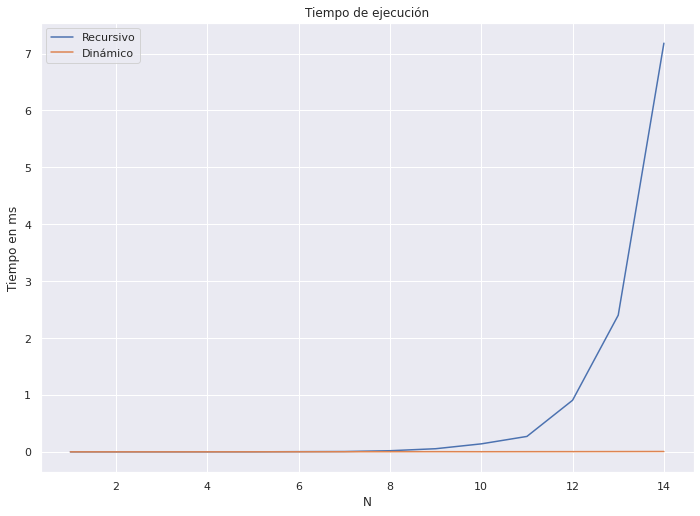

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

x=[];y=[];z=[]

for n in range(1,15):
  keys, p, q = optimal_bst_instance_generator(n)
  w=len(keys)
  l = repeat(setup="from __main__ import optimalSearchTree", stmt=f"optimalSearchTree({keys},{p},{w})", repeat=1, number=10)
  a = repeat(setup="from __main__ import findOptimalCostA", stmt=f"findOptimalCostA({keys})", repeat=1, number=10)
  x.append(n)
  y.append(l)
  z.append(a)

  
plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Recursivo", "Dinámico"])
plt.title("Tiempo de ejecución")

plt.xlabel('N')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede observar que el algoritmo recursivo tiene un comportamiento exponencial, aumenta el tiempo de ejecución a medida que aumenta n, en cambio el algortimo de programación dinámica tiene un comportamiento "lineal" en la gráfica, no olvidar que el tiempo de ejecución del dinámico es cúbico.